# Business Ties

Can we piece the business community/ economy of Eigg together from data online

In [11]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import json
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [12]:
def getTouristOrgs():
    # Assumption; cafe is not tourism driven since residents will also regularly use
    return ["Craigard Teas", "Eigg Yurts", "TIGH AN SITHEAN", "Tophouse", "Selkie Explorers", "Eigg Adventures", "Eigg Camping Pods", "Kildonnan House", "Sweeney's Bothy", "The Bothy Cuagach", "Eigg Huts", "Eigg Shed", "Sweeney's Bothy", "Eddie's Eigg Croft", "Eigg Huts", "Glebe Barn", "Equilibrium Eigg Massage Therapy", "Eigg Organics", "Lagerona"]

def involvedInTourism():
    relationships = {}
    tourismOrgSet = set(getTouristOrgs())
    net = customByBusiness()
    for item in net:
        entireSet = set(net[item])
        relationships[item] = 1 if item in tourismOrgSet else 0
    relationships['Small Isles Medical Centre'] = 1
    return relationships

In [17]:
def buildDirectLinkNetOnly():
    G = nx.Graph()
    
    data = customByBusiness()
        
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
    G.add_node('Small Isles Medical Centre')
        
    for name1 in names:
        connects = data[name1]
        for item in connects:
            G.add_edge(name1,item)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    labels['Small Isles Medical Centre'] = 'Small Isles Medical Centre'
    return G, labels

def plotGraph(G,labels,colors=None):
    pos=nx.spring_layout(G,k=0.55)
    nx.draw(G,pos,node_color=colors)
    for label in pos:
        x,y = pos[label]
        plt.text(x,y+0.035,s=labels[label],horizontalalignment='center',fontsize=24)

(26, 26)



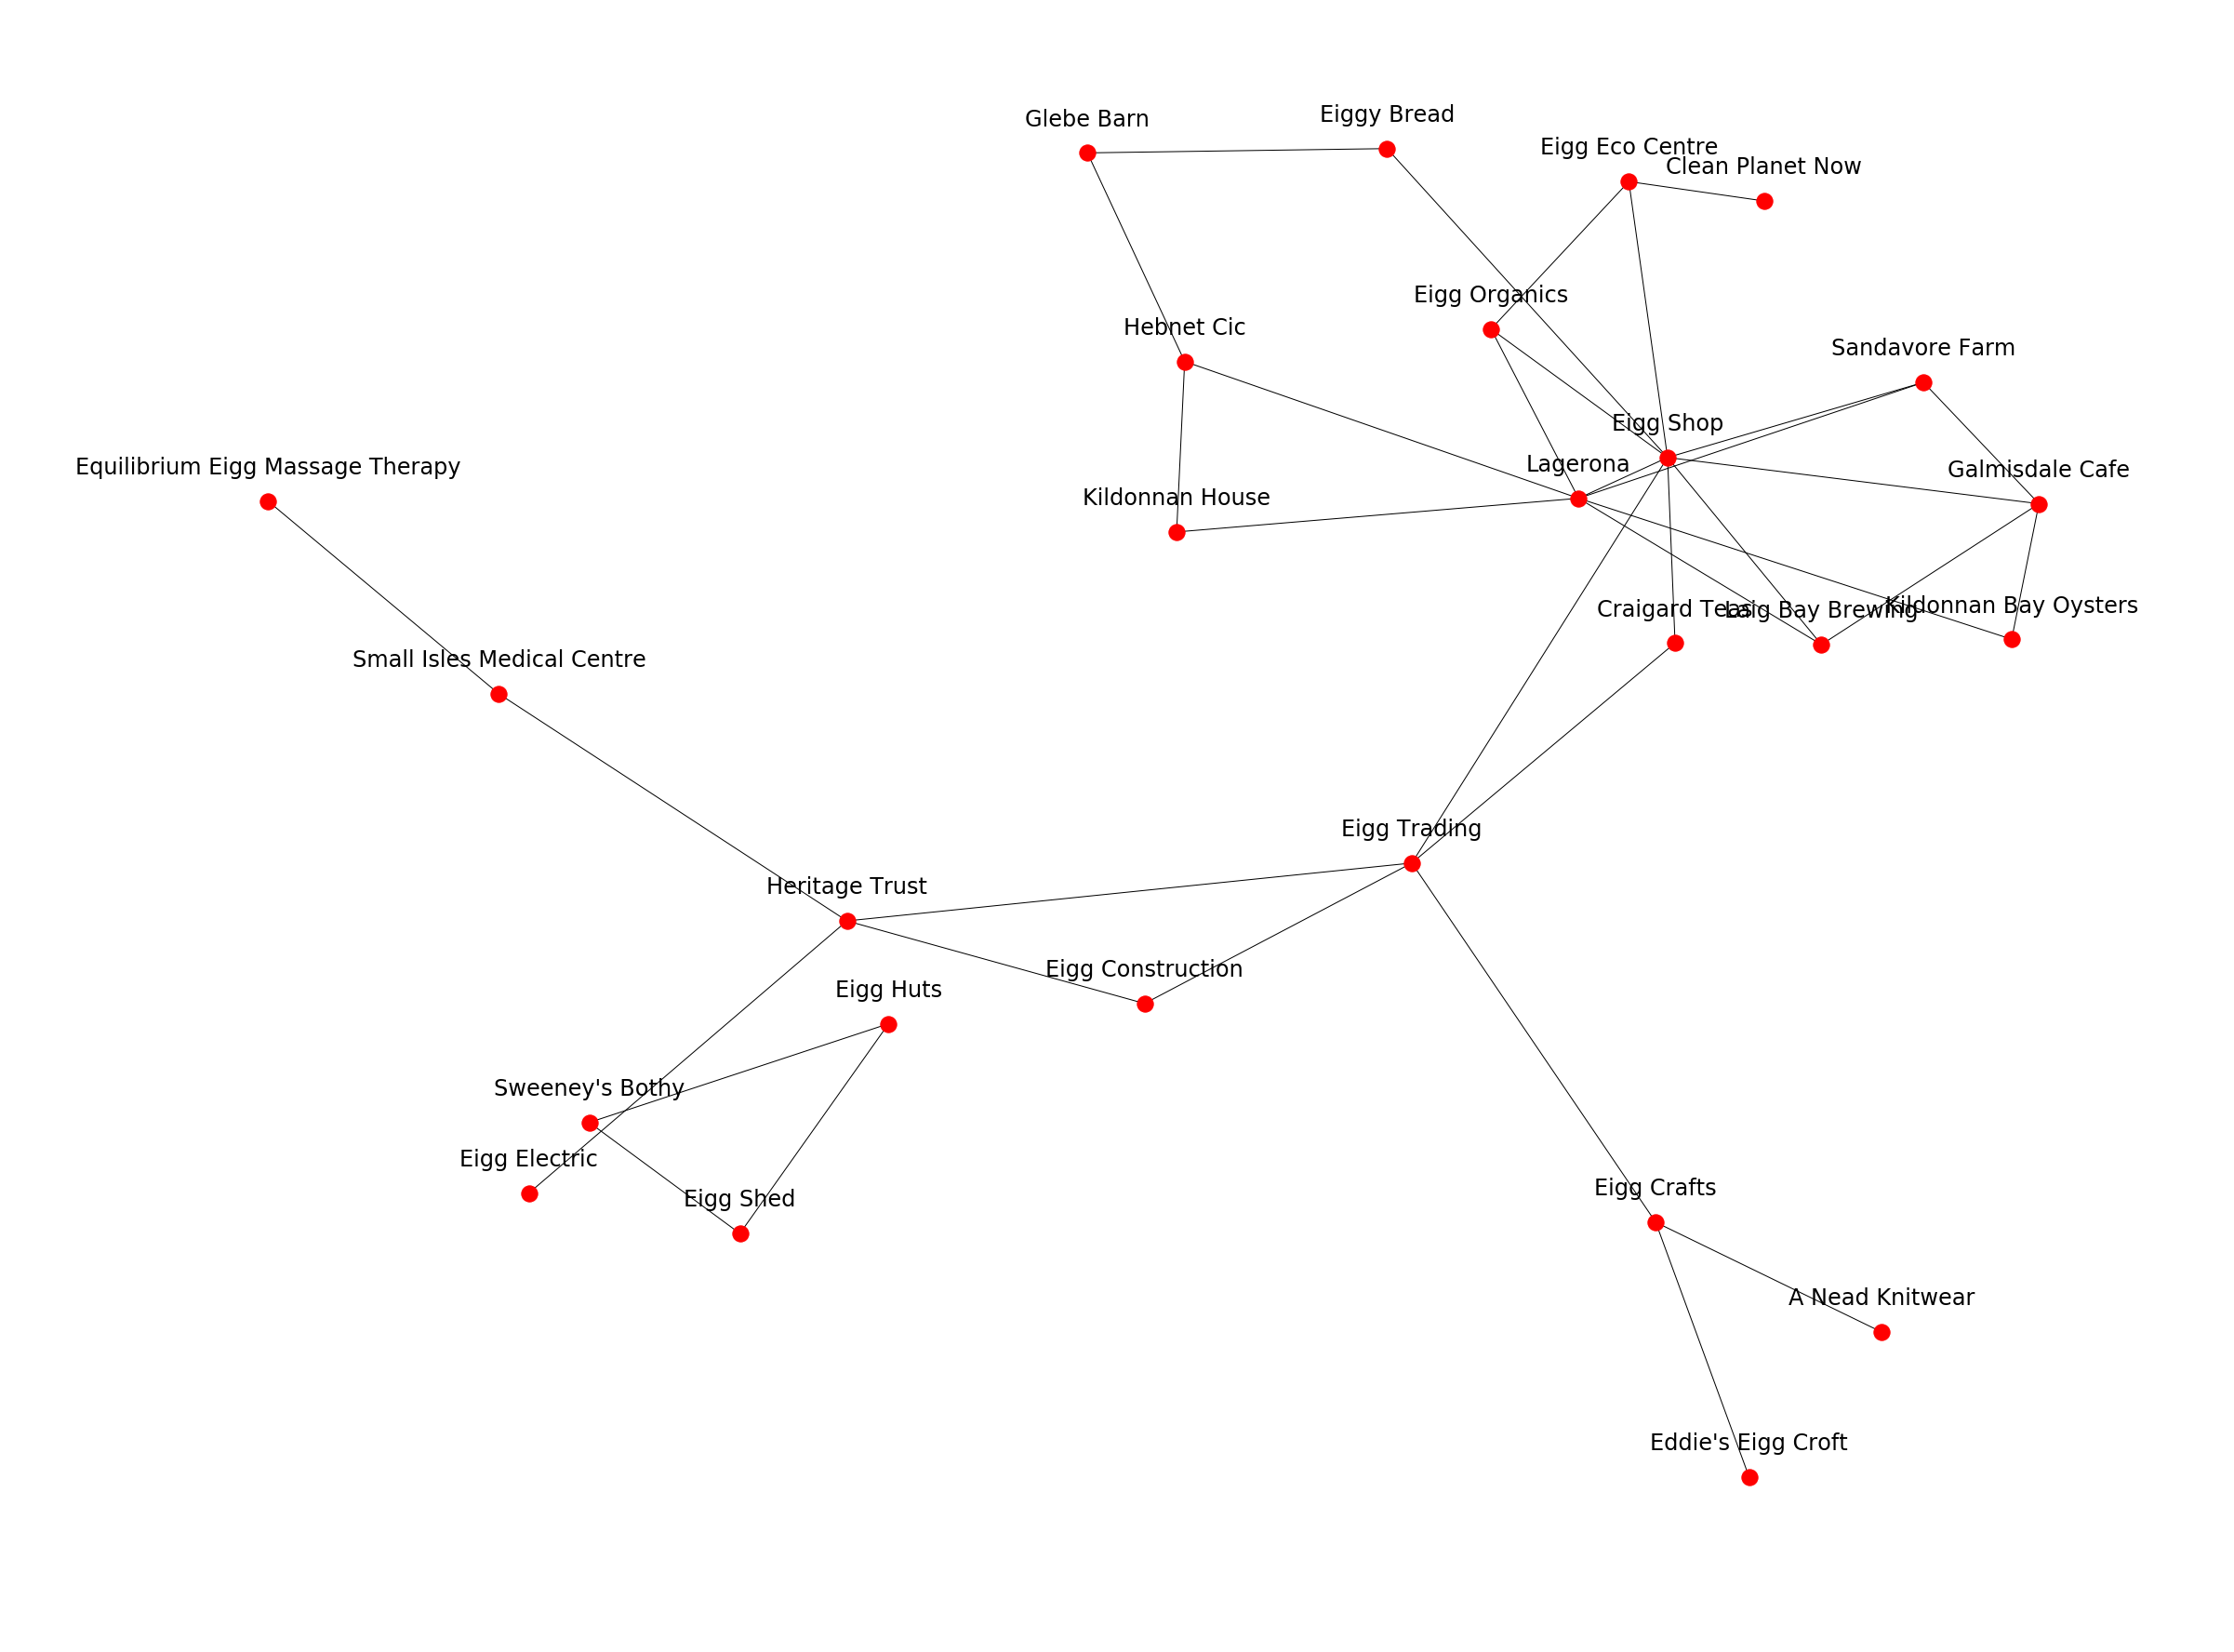

In [19]:
inTourism = involvedInTourism()
G,labels = buildDirectLinkNetOnly()
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
# colors = ["green" if inTourism[x] == 1 else "red" for x in G.nodes()]
plotGraph(G,labels,'red')

saveGraphToFile(G,'noElec.txt')
labelsInOrder = list(G.nodes())
attributesInOrder = list(map(lambda x: inTourism[x],G.nodes()))
np.savetxt('noElecLabels.txt', labelsInOrder, '%s')
np.savetxt('noElecAttr.txt', attributesInOrder, "%s")

In [7]:
def buildNamedBusinessGraph(inferred=False):
    G = nx.Graph()
    
    data = uninferredNamesGraph()
    if inferred:
        data = inferredNamesGraph()
        
    #data = customByBusiness()
                
    names = data.keys()
    for k,i in enumerate(names): G.add_node(i)
        
    for name1 in names:
        for name2 in names:
            if name1 != name2 and len(list(set(data[name1]) & set(data[name2]))):
                G.add_edge(name1,name2)
    
    labels={}
    for k,i in enumerate(names): labels[i] = i
    return G, labels

def buildBusinessGraph(inferred=False):
    G = nx.Graph()
    data = uninferredNamesGraph()
    if inferred:
        data = inferredNamesGraph()
    
    names = data.keys()
    businesses = list(Counter([item for sublist in data.values() for item in sublist]).keys())
    
    businessMembers = defaultdict(list)
    for b in businesses:
        for name in names:
            if b in data[name]:
                businessMembers[b].append(name)
            
    businessList = businessMembers.keys()
    for k,i in enumerate(businessList): G.add_node(i)
    for b1 in businessList:
        for b2 in businessList:
            if b1 != b2 and len(list(set(businessMembers[b1]) & set(businessMembers[b2]))):
                G.add_edge(b1,b2)
    
    labels={}
    for k,i in enumerate(businessList): labels[i] = i
    return G, labels

def poliFn(companiesForPerson):
    buildStr = ""
    buildStr += str(int("Heritage Trust" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Electric" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Construction" in companiesForPerson)) + " "
    buildStr += str(int("Eigg Trading" in companiesForPerson))
    
    return buildStr

def saveComplexPoliticalAttributes(G,dataDict):
    labelsInOrder = list(G.nodes())
    attributesInOrder = list(map(lambda x: poliFn(dataDict[x]),G.nodes()))
    np.savetxt('privateNetAttrLabels.txt', labelsInOrder, '%s')
    np.savetxt('privateNetAttrAttributes.txt', attributesInOrder, "%s")
    
def saveGraphToFile(G, filename="testing.txt"):
    file_ = nx.to_numpy_matrix(G)
    labelsInOrder = list(G.nodes())
    np.savetxt('testingLabs.txt', labelsInOrder, '%s')
    np.savetxt(filename,file_, "%d") 

62


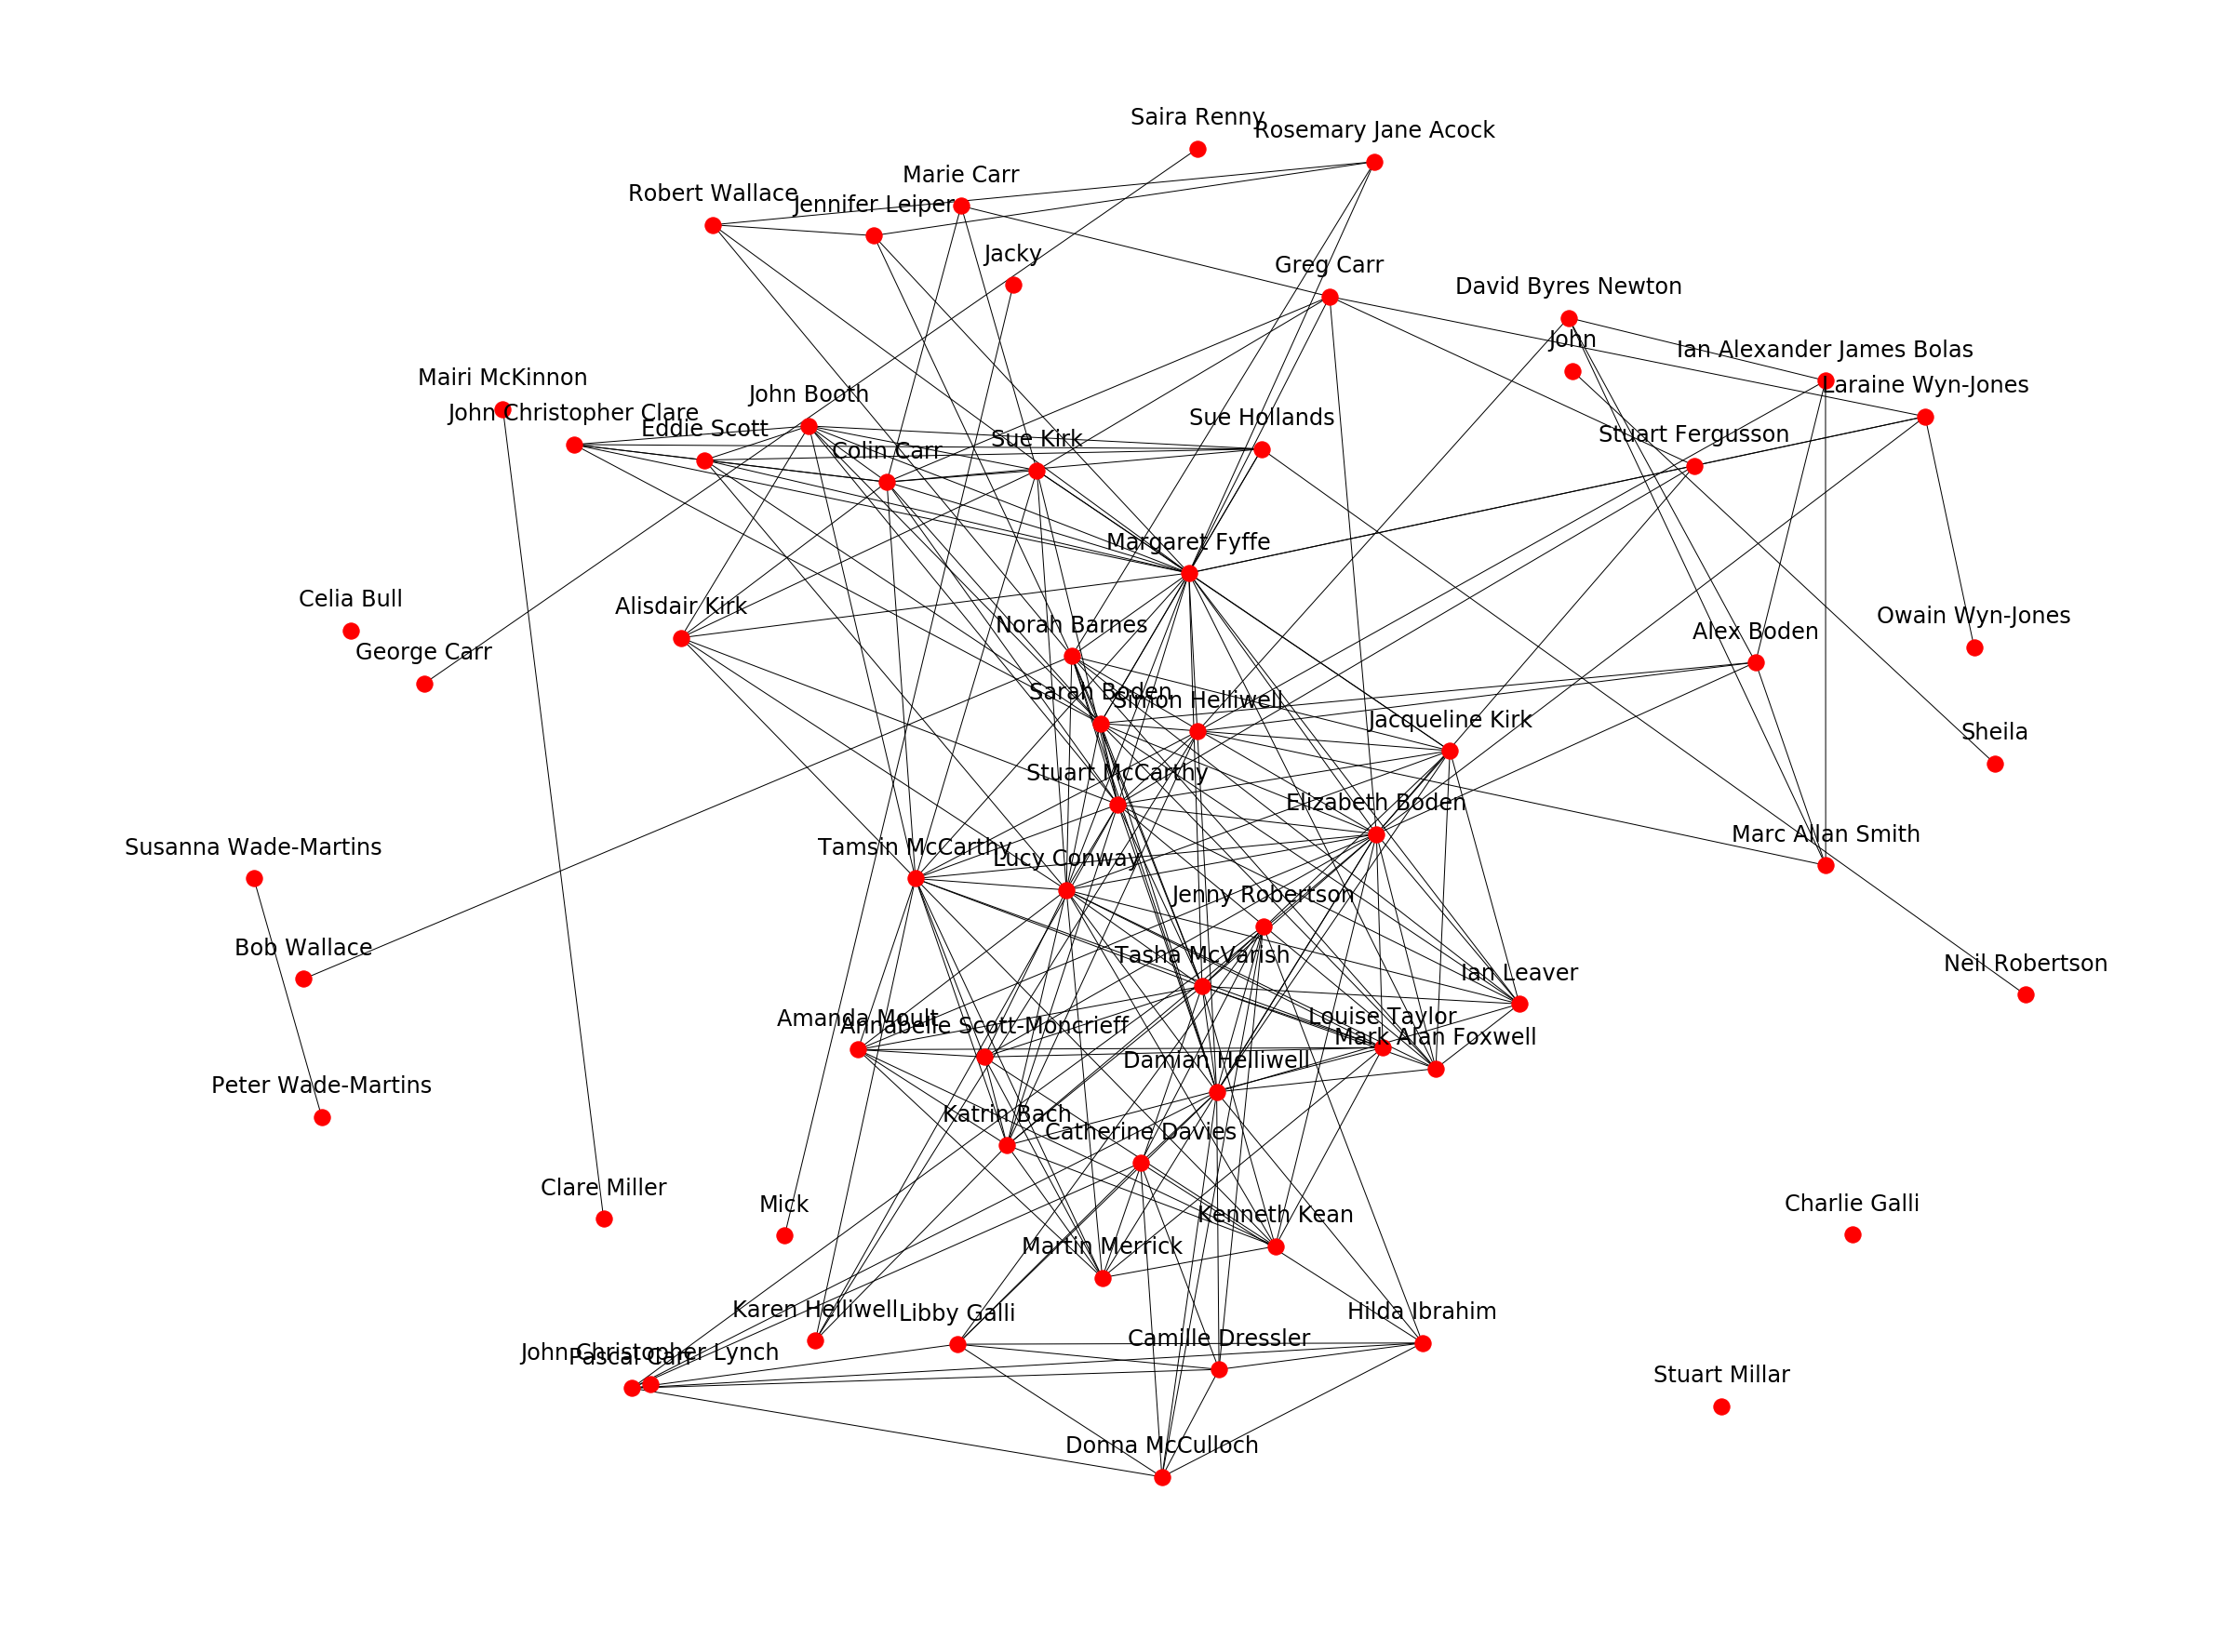

In [9]:
G, labels= buildNamedBusinessGraph()
print(len(G.degree))
pos=nx.spring_layout(G,k=1)
#nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos,color=None)
saveGraphToFile(G)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)

In [ ]:
G, labels= buildBusinessGraph()
print(G.nodes())

G.remove_nodes_from(list(nx.isolates(G)))

pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
saveGraphToFile(G)

for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)

In [ ]:
list(G.edges())

In [ ]:
G, labels= buildNamedBusinessGraph(inferred=True)
pos=nx.spring_layout(G,k=1)
saveGraphToFile(G,"namedBusinessNet.txt")
#nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)
print(len(G.edges()))
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)

In [ ]:
G, labels= buildBusinessGraph(inferred=True)
pos=nx.spring_layout(G,k=1)
saveGraphToFile(G,"businessNet.txt")
nx.draw_networkx_labels(G,pos,labels,font_size=16)
nx.draw(G,pos)

In [ ]:
d = inferredBusinessLocations()
dict_ = {}

for item in d:
    one,two = d[item].split(",")
    dict_[item] = [float(one),float(two)]

generateMapJSON([('./fullColMarkers/marker76.png',list(dict_.values()),list(dict_.keys()))],[(dict_,G)],'businessByLocation.txt')